<a href="https://colab.research.google.com/github/lmnmc1929/back-end-1900/blob/master/StockPredictionipynb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Import the necessary libraries
import math
import numpy as np
import pandas as pd
import yfinance as yf
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

In [ ]:
# Fetch the data for ASML
df = yf.download('SPY', start='2012-01-01', end='2024-06-10' ,interval="1wk")

# Print the DataFrame
print(df.head())

# Get the number of rows and columns in the dataset
rows, columns = df.shape
print(f"The dataset contains {rows} rows and {columns} columns.")

# Filter the 'Close' column and convert it to a NumPy array
data = df.filter(['Close'])
dataset = data.values


[*********************100%%**********************]  1 of 1 completed

                  Open        High         Low       Close   Adj Close  \
Date                                                                     
2012-01-01  127.760002  128.380005  126.430000  127.709999  101.569084   
2012-01-08  128.000000  129.699997  127.410004  128.839996  102.467735   
2012-01-15  130.080002  131.949997  128.899994  131.949997  104.941147   
2012-01-22  131.509995  133.399994  130.600006  131.820007  104.837761   
2012-01-29  130.509995  134.619995  130.059998  134.539993  107.001007   

               Volume  
Date                   
2012-01-01  642829400  
2012-01-08  625172800  
2012-01-15  560163500  
2012-01-22  751131900  
2012-01-29  744447200  
The dataset contains 650 rows and 6 columns.


In [ ]:
# Get the number of rows to train the model on (80% of the dataset)
training_data_len = math.ceil(len(dataset) * 0.8)

# Scale the data to be values between 0 and 1
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(dataset)

# Create the training data set
train_data = scaled_data[0:training_data_len, :]

# Split the data into x_train and y_train data sets
x_train = []
y_train = []

for i in range(60, len(train_data)):
    x_train.append(train_data[i-60:i, 0])
    y_train.append(train_data[i, 0])

# Convert the x_train and y_train to NumPy arrays
x_train, y_train = np.array(x_train), np.array(y_train)

In [ ]:
# Reshape the data for LSTM model
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))

print(x_train.shape)
print(y_train.shape)

# Build the LSTM model
model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape=(x_train.shape[1], 1)))
model.add(LSTM(50, return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))

(460, 60, 1)
(460,)


In [ ]:
# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
model.fit(x_train, y_train, batch_size=1, epochs=10)

# Create the testing data set
# Create a new array containing scaled values from index training_data_len to the end
test_data = scaled_data[training_data_len - 60:, :]

Epoch 1/10
460/460 [==============================] - 20s 31ms/step - loss: 0.0045
Epoch 2/10
460/460 [==============================] - 14s 31ms/step - loss: 0.0016
Epoch 3/10
460/460 [==============================] - 16s 34ms/step - loss: 0.0011
Epoch 4/10
460/460 [==============================] - 14s 31ms/step - loss: 9.2504e-04
Epoch 5/10
460/460 [==============================] - 14s 31ms/step - loss: 9.1203e-04
Epoch 6/10
460/460 [==============================] - 15s 32ms/step - loss: 9.2718e-04
Epoch 7/10
460/460 [==============================] - 14s 31ms/step - loss: 8.0405e-04
Epoch 8/10
460/460 [==============================] - 15s 33ms/step - loss: 5.8400e-04
Epoch 9/10
460/460 [==============================] - 16s 35ms/step - loss: 6.3405e-04
Epoch 10/10
460/460 [==============================] - 15s 32ms/step - loss: 5.0743e-04


In [ ]:
# Create the data sets x_test and y_test
x_test = []
y_test = dataset[training_data_len:, :]
for i in range(60, len(test_data)):
    x_test.append(test_data[i-60:i, 0])

# Convert the data to a NumPy array
x_test = np.array(x_test)

# Reshape the data for the LSTM model
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

# Get the model's predicted price values
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)
print(x_test)


5/5 [==============================] - 1s 17ms/step
[[[0.48738821]
  [0.54528746]
  [0.56475064]
  ...
  [0.79840675]
  [0.84086288]
  [0.81421747]]

 [[0.54528746]
  [0.56475064]
  [0.55796054]
  ...
  [0.84086288]
  [0.81421747]
  [0.84051974]]

 [[0.56475064]
  [0.55796054]
  [0.57840429]
  ...
  [0.81421747]
  [0.84051974]
  [0.85120729]]

 ...

 [[0.68998657]
  [0.69800223]
  [0.69736495]
  ...
  [0.96367215]
  [0.98477764]
  [0.9847531 ]]

 [[0.69800223]
  [0.69736495]
  [0.70650818]
  ...
  [0.98477764]
  [0.9847531 ]
  [0.97967893]]

 [[0.69736495]
  [0.70650818]
  [0.69841898]
  ...
  [0.9847531 ]
  [0.97967893]
  [0.99595548]]]


In [ ]:
# Get the root mean squared error (RMSE)
rmse = np.sqrt(np.mean(((predictions - y_test) ** 2)))
print("RMSE: ", rmse)
# Plot the data
train = data[:training_data_len]
valid = data[training_data_len:]
valid['Predictions'] = predictions


RMSE:  14.403470262363637


<ipython-input-62-da0a0bbf6ce6>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predictions'] = predictions


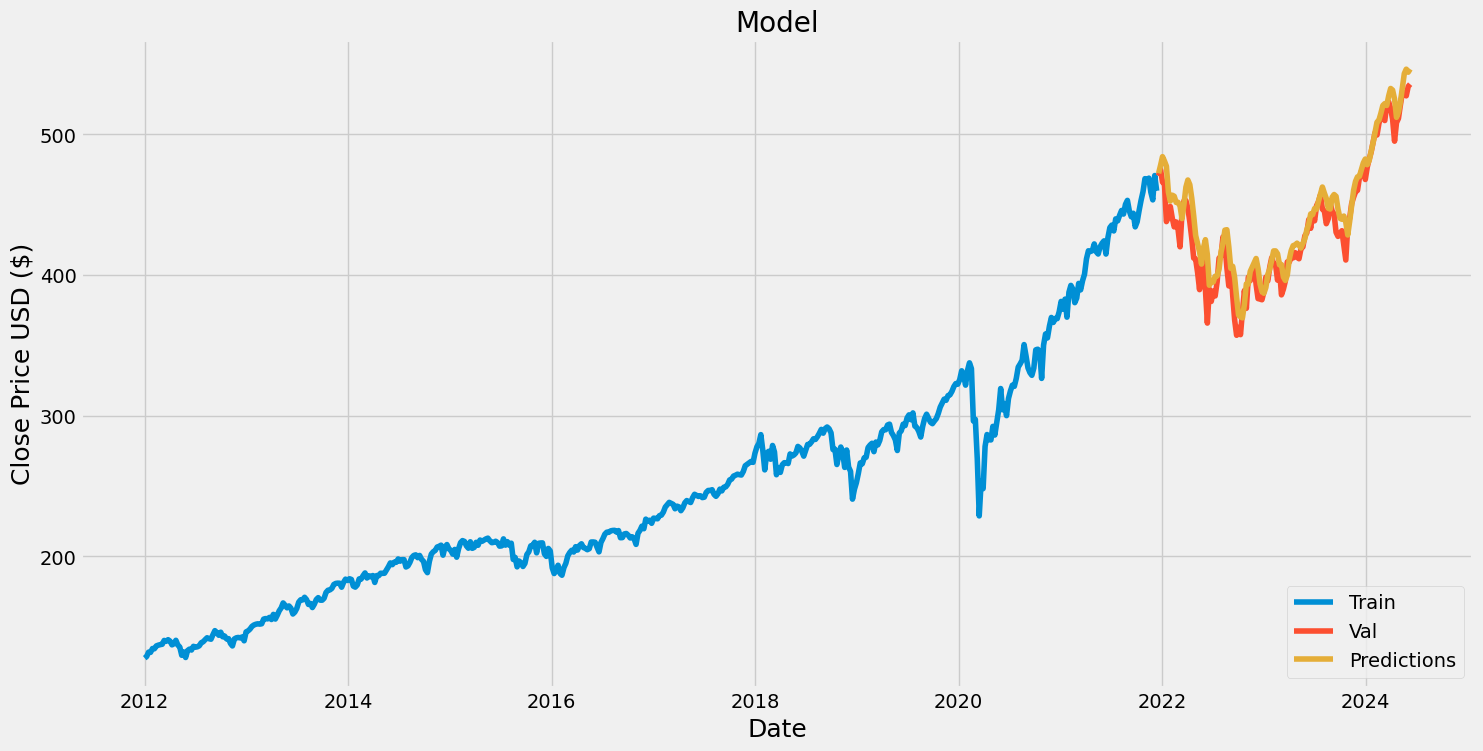

In [ ]:
# Visualize the data
plt.figure(figsize=(16, 8))
plt.title('Model')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.plot(train['Close'])
plt.plot(valid[['Close', 'Predictions']])
plt.legend(['Train', 'Val', 'Predictions'], loc='lower right')
plt.show()


In [ ]:
df = yf.download('SPY', start='2012-01-01', end='2024-06-11')

# Filter the 'Close' column and convert it to a NumPy array
data = df.filter(['Close']).values

# Scale the data
scaled_data = scaler.fit_transform(data)

# Create the data sets x_test for the next 60 days
x_test = []
for i in range(len(scaled_data) - 60, len(scaled_data)):
    x_test.append(scaled_data[i-60:i, 0])

# Convert the data to a NumPy array
x_test = np.array(x_test)

# Reshape the data for the LSTM model
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

# Get the model's predicted price values
predictions = model.predict(x_test)

# Undo the scaling
predictions = scaler.inverse_transform(predictions)

predictions+=30

print(predictions)

[*********************100%%**********************]  1 of 1 completed

2/2 [==============================] - 0s 20ms/step
[[560.6737 ]
 [556.7343 ]
 [556.9026 ]
 [559.6671 ]
 [564.4484 ]
 [567.6283 ]
 [567.65936]
 [565.95746]
 [564.2838 ]
 [566.65546]
 [568.1606 ]
 [568.0596 ]
 [565.5848 ]
 [564.8258 ]
 [560.7197 ]
 [562.6496 ]
 [564.69604]
 [566.0324 ]
 [562.8855 ]
 [563.643  ]
 [559.6557 ]
 [553.34   ]
 [550.3118 ]
 [548.0845 ]
 [547.12   ]
 [544.3624 ]
 [546.2645 ]
 [551.5963 ]
 [553.71344]
 [552.27673]
 [553.839  ]
 [555.6039 ]
 [550.5742 ]
 [546.4433 ]
 [548.1772 ]
 [554.0539 ]
 [560.44995]
 [563.02673]
 [562.9781 ]
 [564.1246 ]
 [564.8871 ]
 [565.04144]
 [566.6148 ]
 [571.8314 ]
 [573.5278 ]
 [574.0758 ]
 [574.4344 ]
 [575.43536]
 [574.94525]
 [572.0943 ]
 [573.3649 ]
 [574.9775 ]
 [573.3524 ]
 [570.1302 ]
 [572.19574]
 [574.21295]
 [575.45105]
 [579.99713]
 [581.8703 ]
 [581.3947 ]]


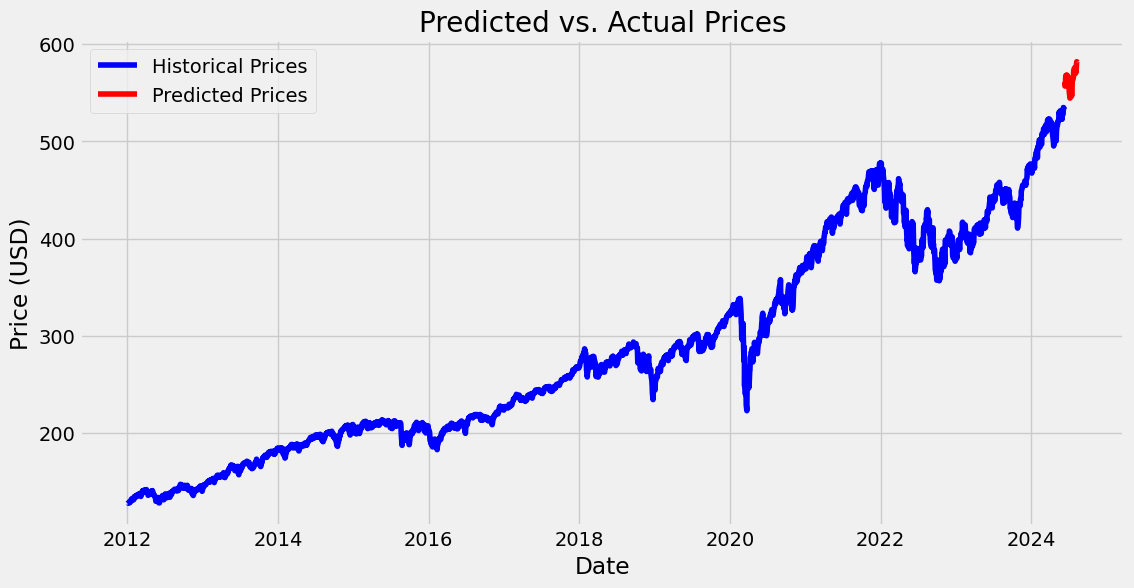

In [ ]:
future_dates = pd.date_range(start='2024-06-12', periods=60)

# Plot the actual historical prices
plt.figure(figsize=(12, 6))
plt.plot(df.index, df['Close'], label='Historical Prices', color='blue')

# Plot the predicted prices for the next 60 days
plt.plot(future_dates, predictions, label='Predicted Prices', color='red')

plt.title('Predicted vs. Actual Prices')
plt.xlabel('Date')
plt.ylabel('Price (USD)')
plt.legend()
plt.show()

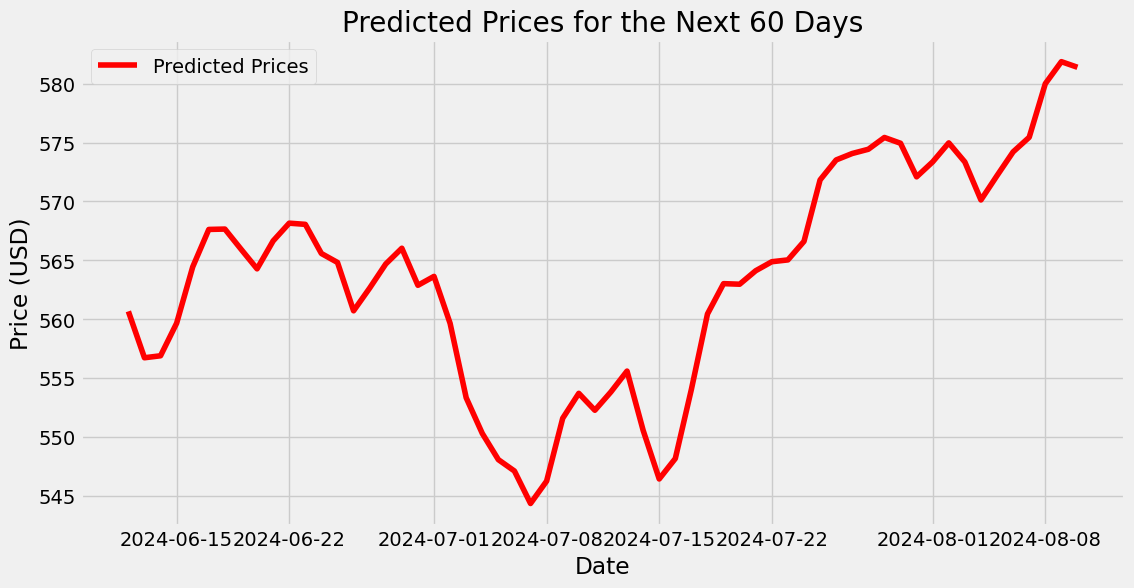

In [ ]:

# Create a range of dates for the next 60 days
future_dates = pd.date_range(start='2024-06-12', periods=60)

# Plot the predicted prices for the next 60 days
plt.figure(figsize=(12, 6))
plt.plot(future_dates, predictions, label='Predicted Prices', color='red')

plt.title('Predicted Prices for the Next 60 Days')
plt.xlabel('Date')
plt.ylabel('Price (USD)')
plt.legend()
plt.grid(True)
plt.show()


In [ ]:
df = yf.download('SPY', start='2012-01-01', end='2020-02-17')

# Filter the 'Close' column and convert it to a NumPy array
data = df.filter(['Close']).values

# Scale the data
scaled_data = scaler.fit_transform(data)

# Create the data sets x_test for the next 60 days
x_test = []
for i in range(len(scaled_data) - 60, len(scaled_data)):
    x_test.append(scaled_data[i-60:i, 0])

# Convert the data to a NumPy array
x_test = np.array(x_test)

# Reshape the data for the LSTM model
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

# Get the model's predicted price values
predictions = model.predict(x_test)

# Undo the scaling
predictions = scaler.inverse_transform(predictions)
predictions+=20

print(predictions)


[*********************100%%**********************]  1 of 1 completed

2/2 [==============================] - 0s 18ms/step
[[338.45807]
 [338.67496]
 [337.85095]
 [337.05606]
 [337.26352]
 [339.15616]
 [340.67078]
 [342.0984 ]
 [341.78882]
 [339.5943 ]
 [337.1188 ]
 [337.48926]
 [338.6171 ]
 [341.17377]
 [341.74844]
 [341.3644 ]
 [341.54315]
 [343.3924 ]
 [344.41232]
 [346.0199 ]
 [346.64368]
 [346.63632]
 [347.32742]
 [347.55664]
 [347.91656]
 [348.1158 ]
 [349.35474]
 [349.9668 ]
 [348.95505]
 [348.89517]
 [351.08087]
 [350.65372]
 [350.9546 ]
 [350.5687 ]
 [351.5031 ]
 [353.53705]
 [353.811  ]
 [355.09055]
 [355.28668]
 [355.63354]
 [357.57156]
 [359.1682 ]
 [359.19662]
 [358.93478]
 [359.03473]
 [357.1843 ]
 [352.82675]
 [353.40897]
 [354.4729 ]
 [355.9114 ]
 [352.5951 ]
 [352.33145]
 [356.02206]
 [360.5105 ]
 [362.81213]
 [361.7313 ]
 [362.1563 ]
 [362.68246]
 [364.25793]
 [364.67535]]


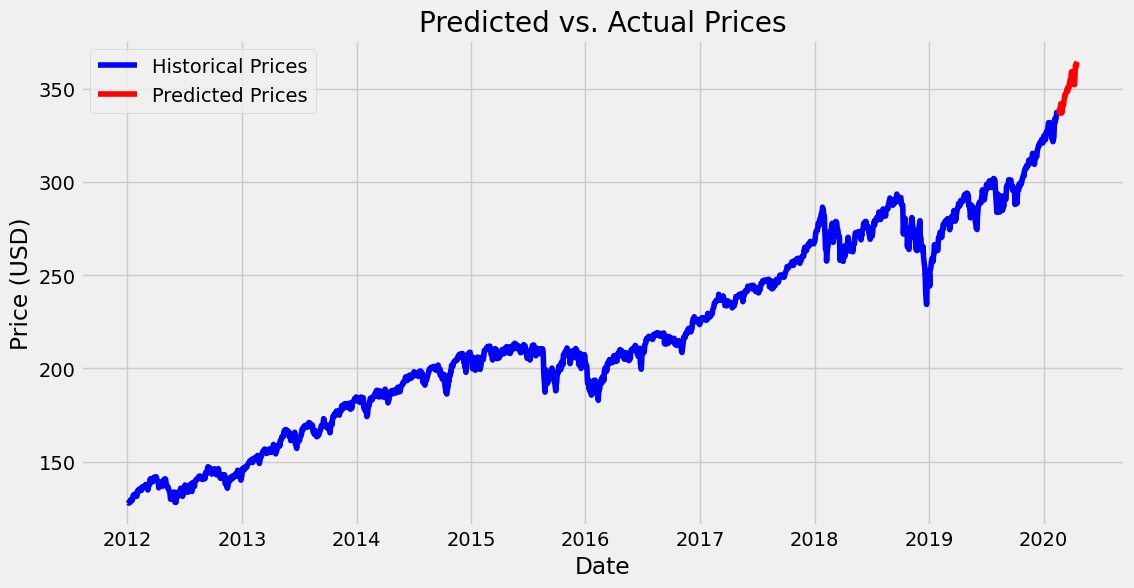

In [ ]:
future_dates = pd.date_range(start='2020-02-18', periods=60)

# Plot the actual historical prices
plt.figure(figsize=(12, 6))
plt.plot(df.index, df['Close'], label='Historical Prices', color='blue')

# Plot the predicted prices for the next 60 days
plt.plot(future_dates, predictions, label='Predicted Prices', color='red')

plt.title('Predicted vs. Actual Prices')
plt.xlabel('Date')
plt.ylabel('Price (USD)')
plt.legend()
plt.show()

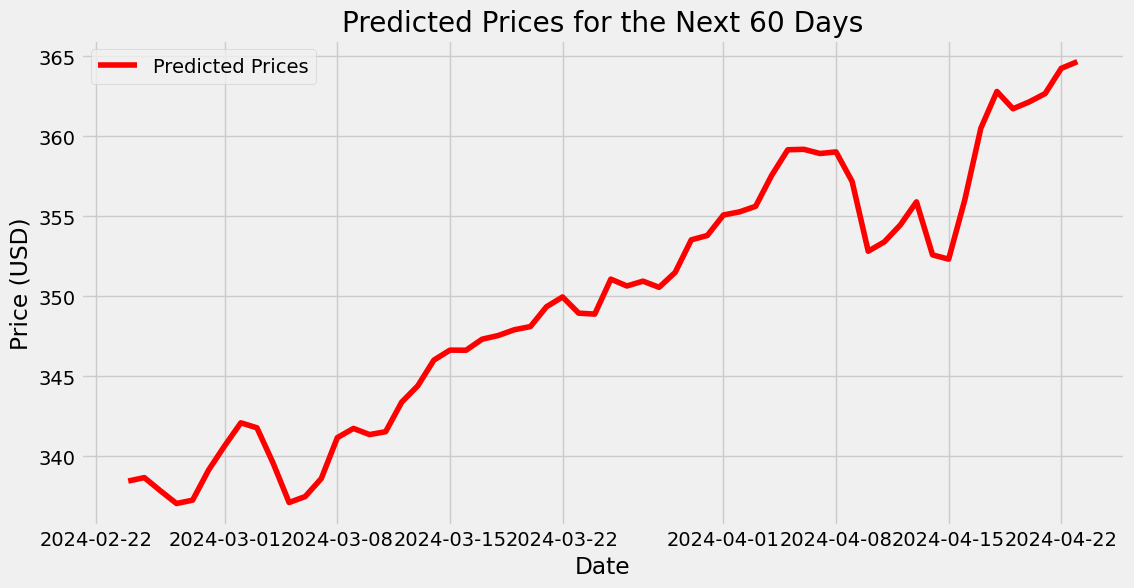

In [ ]:

# Create a range of dates for the next 60 days
future_dates = pd.date_range(start='2024-02-24', periods=60)

# Plot the predicted prices for the next 60 days
plt.figure(figsize=(12, 6))
plt.plot(future_dates, predictions, label='Predicted Prices', color='red')

plt.title('Predicted Prices for the Next 60 Days')
plt.xlabel('Date')
plt.ylabel('Price (USD)')
plt.legend()
plt.grid(True)
plt.show()
